In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn
from textwrap import wrap

In [2]:
df = pd.read_excel('/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/Zeta-Potential_Plots/1016_ZetaPotentialData.xlsx')

In [3]:
df_sorted = df.sort_values(by='Zeta Potential', ascending=False)
polymer = df_sorted["Polymer"]
zeta = df_sorted['Zeta Potential']
stdev = df_sorted['Stdev']

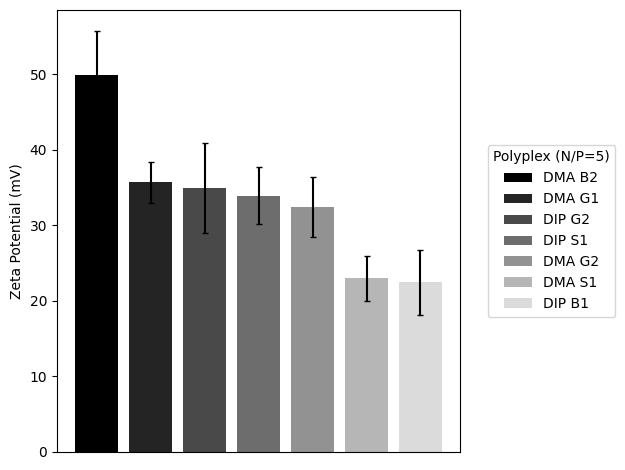

In [6]:
# generate shades of gray
num_polymer = polymer.nunique()
shades_of_gray = [str(i/num_polymer) for i in range(num_polymer)]

# map each polymer to a shade
polymer_to_shade = dict(zip(polymer.unique(), shades_of_gray))

# plot bars individually to set color and label for each polymer
for p in polymer.unique():
    plt.bar(p, zeta[polymer == p].values[0], 
            yerr=stdev[polymer == p].values[0], 
            capsize=2, 
            color=polymer_to_shade[p], 
            label=p)

plt.ylabel('Zeta Potential (mV)')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', title='Polyplex (N/P=5)')
plt.tight_layout()
plt.show()